# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [71]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [73]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.307,0.883,0,0,0,NaN,NaN,NaN,0.0,10.0,0.064788,0.039155,0.039155,0.010106,0.101064,0.018375
1,crossfold,5,Popular,Y,0.307,1.019,0,0,0,NaN,NaN,NaN,0.0,10.0,0.081195,0.058175,0.058175,0.010638,0.106383,0.019342
2,crossfold,4,PersMean,Y,0.590,0.973,188,188,188,1.0,0.736999,0.953139,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,crossfold,5,PersMean,Y,0.641,0.996,188,188,188,1.0,0.804063,1.044473,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,crossfold,3,Popular,Y,0.041,0.399,0,0,0,NaN,NaN,NaN,0.0,10.0,0.073914,0.046485,0.046485,0.013228,0.132275,0.024050


In [74]:
results

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.307,0.883,0,0,0,NaN,NaN,NaN,0.0,10.0,0.064788,0.039155,0.039155,0.010106,0.101064,0.018375
1,crossfold,5,Popular,Y,0.307,1.019,0,0,0,NaN,NaN,NaN,0.0,10.0,0.081195,0.058175,0.058175,0.010638,0.106383,0.019342
2,crossfold,4,PersMean,Y,0.590,0.973,188,188,188,1.000000,0.736999,0.953139,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,crossfold,5,PersMean,Y,0.641,0.996,188,188,188,1.000000,0.804063,1.044473,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,crossfold,3,Popular,Y,0.041,0.399,0,0,0,NaN,NaN,NaN,0.0,10.0,0.073914,0.046485,0.046485,0.013228,0.132275,0.024050
5,crossfold,3,PersMean,Y,0.266,0.695,189,189,189,1.000000,0.857420,1.063172,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,crossfold,2,PersMean,Y,0.173,0.325,189,189,189,1.000000,0.783818,0.968072,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,crossfold,5,ItemItem,Y,3.911,5.345,188,188,188,1.000000,0.781876,1.013220,1.0,10.0,0.004186,0.001824,0.001824,0.001064,0.010638,0.001934
8,crossfold,3,ItemItem,Y,3.714,2.476,189,189,189,1.000000,0.791111,0.993929,1.0,10.0,0.009102,0.004189,0.004189,0.002116,0.021164,0.003848
9,crossfold,4,ItemItem,Y,3.249,6.167,188,188,188,1.000000,0.714987,0.907064,1.0,10.0,0.001895,0.000760,0.000760,0.000532,0.005319,0.000967


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [75]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,TopN.ActualLength,nDCG,MRR,MAP,Precision,Recall,F1
Algorithm,,,,,,,,,,,,,,,,
ItemItem,3.9048,4.4710,188.6,188.6,188.4,0.998942,0.756727,0.960141,1.0,10.0,0.009202,0.004313,0.004313,0.001906,0.019065,0.003466
PersMean,0.3436,0.6804,188.6,188.6,188.6,1.000000,0.802064,1.011068,1.0,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Popular,0.1626,0.5366,0.0,0.0,0.0,NaN,NaN,NaN,0.0,10.0,0.074585,0.045315,0.045315,0.012191,0.121913,0.022166
SLIM,107.7770,0.2300,188.6,188.6,188.6,1.000000,2.325614,2.632773,1.0,10.0,0.225072,0.158550,0.158550,0.032875,0.328752,0.059773


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

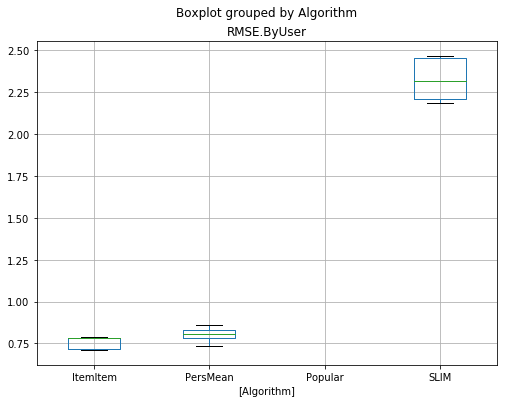

In [76]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm', figsize=(8,6))

Next up: nDCG

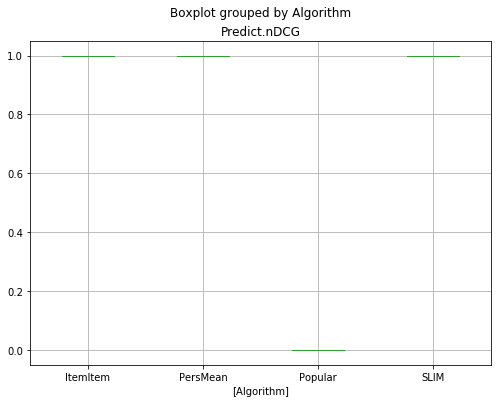

In [77]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec8bc50198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fec8baf2278>], dtype=object)

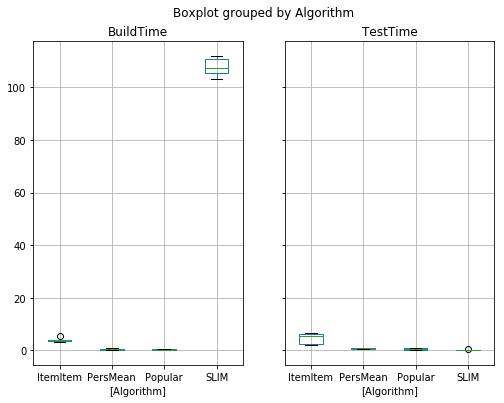

In [78]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

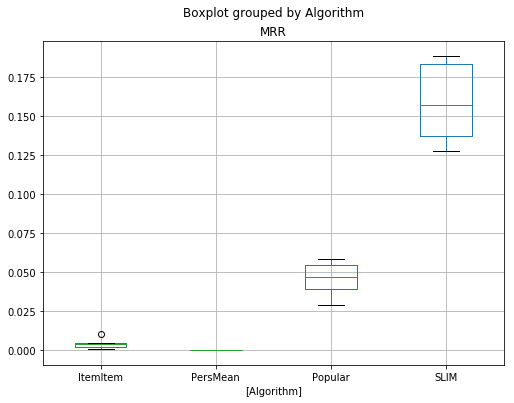

In [79]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

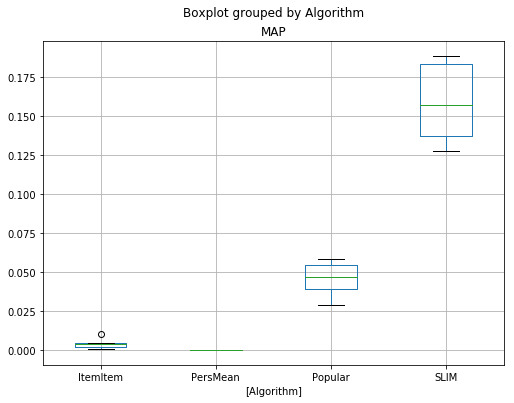

In [80]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

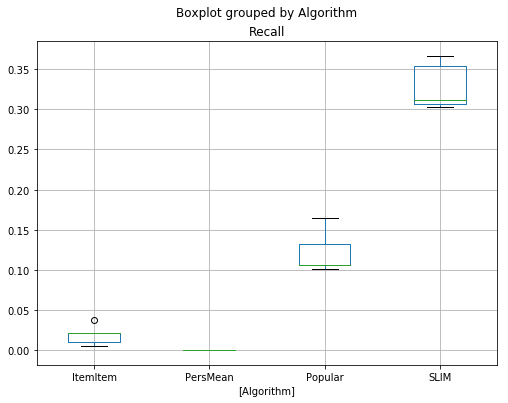

In [81]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

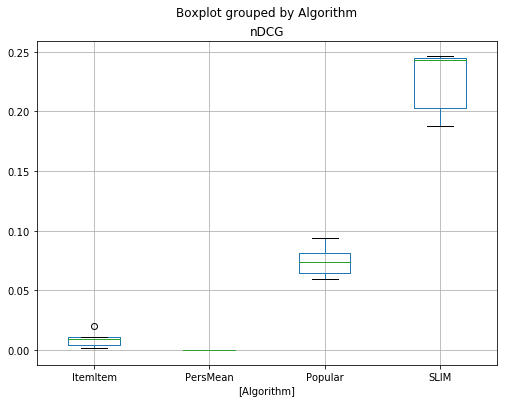

In [83]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))